<span style="font-size: 14pt">MIPT, Advanced ML, Autumn 2017</span>

<span style="font-size: 16pt"> HW #3: ARIMAX, Compositions

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

**Дополнительный материал для выполнения дз**:
- Магнус Я.Р., Катышев П.К., Пересецкий А.А. Эконометрика. Начальный курс., глава 11
- Лукашин Ю.П. Адаптивные методы краткосрочного прогнозирования временных рядов. Финансы и статистика. 2003, главы 1,4,5,7.

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall <номер_группы> <фамилия>``, к примеру -- ``ML2017_Aut_fall 401 ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb``, к примеру -- ``ivanov_401_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall Question <Содержание вопроса>``

<span style="color:red; font-size: 14pt;"> DEADLINE: 10 October 2017 23:59:59 </span>

--------
- **PS1**: Мы используем автоматические фильтры, и просто не найдем ваше дз, если вы не аккуратно его подпишите.
- **PS2**: Напоминаем, что дедлайны жесткие, письма пришедшие после автоматически удаляются =( чтобы соблазна не было 


<h1 align="center">Check Questions (20%)</h1> 

Ответе на вопросы своими словами (загугленный материал надо пересказать), ответ обоснуйте (напишите и ОБЪЯСНИТЕ формулки если потребуется), если не выходит, то вернитесь к лекции дополнительным материалам:

**Вопрос 1** Опишите ситуацию (аргументированно), в котором композиция Adaptive Selection будет прогнозировать хуже, чем лучший из базовых алгоритмов.

Пусть $Y[t] = 1 \forall t \in T$, т.е. временной ряд просто константа в любой момент времени. Пусть каждый из базовых алгоритмов дает предсказания $Y_n[t] = 1 - n \delta(\varepsilon), n \in [1,2,\dots]$. Наилучший алгоритм для $n = 1$. Но можно так выбрать $\delta(\varepsilon)$ что для композиции будут выбраны несколько базовых алгоритмов, помимо лучшего. Тогда $Y_{\text{mix}} < 1 - \delta = Y_1[t] < 1$. Композиция работает хуже.



**Вопрос 2**  Опишите ситуацию (аргументированно), в котором композиция Adaptive Composition будет прогнозировать хуже, чем лучший из базовых алгоритмов.

Аналогично ответу на Вопрос 1. Одно отличие, что веса будут выбраны в зависимости от качества алгоритма, но предсказанные значения все равно будут меньше (дaльше от 1) чем для алгоритма $n = 1$.

**Вопрос 3** Что значит смешиваемость (mixability) игры (в теории агрегирующего алгоритма)?

![title](mix.png)

**Вопрос 4**: Верно ли, что для смешиваемых игр процесс потерь любой композиции (любого алгоритма) будет расти со временем (с ростом $t$) не быстрее, чем процесс потерь лучшего из базовых алгоритмов? Если нет - приведит пример, когда это не так.

### $$ \mathrm{Loss}_{Composition}(T)\leq \inf\limits_{BA} \mathrm{Loss}_{BA}(T)+C$$

Кажется, что нет. 
Композиция может быть очень плохой, например которая берет предсказания нихудшего алгоритма. 
И, например, в задаче предсказания детерминированного процесса, у лучшего алгоритма будет точность 100%, т.е. $\text{CumLoss} = C_0$, тогда как точность плохого алгоритма (например который добавляет некоторый шум) будет расти. 

<h1 align="center">2. Contest: electricity comsumption contest (80%)</h1>
Take part in <a href='https://www.kaggle.com/t/de102b28cae74e6ead7492ff12efbc63'>contest</a>.
<span style='color:red'> You need to send the final code that is used for building forecast.</span>

In [14]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
%matplotlib inline

In [275]:
sample = pd.read_csv('data/SubmissionSample.csv')
sample.head()

ID  PREDICTED
0  16707     100000
1  16708     100000
2  16709     100000
3  16710     100000
4  16711     100000

In [15]:
df = pd.read_csv('data/train.csv')
df.head()

ID        Date  tsID    ACTUAL  Temp  Saturday  Sunday
0   1  01.01.2010     4  35489.95  -0.9       0.0       1
1   2  02.01.2010     4  35413.59  -0.1       1.0       0
2   3  03.01.2010     4  34802.67  -3.9       0.0       1
3   4  04.01.2010     4  36003.84 -13.7       0.0       1
4   5  05.01.2010     4  37622.96 -16.9       0.0       1

In [90]:
df16 = df[df['tsID'] == 16]

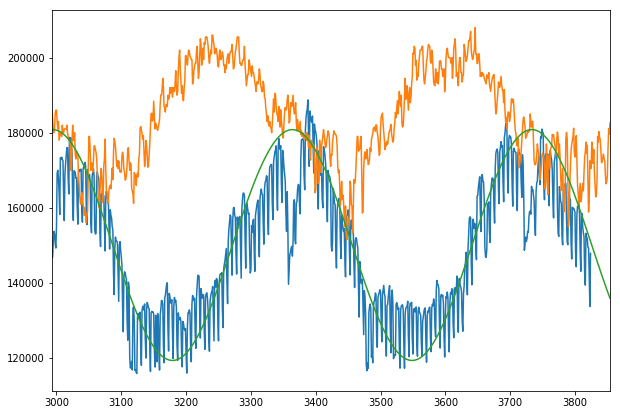

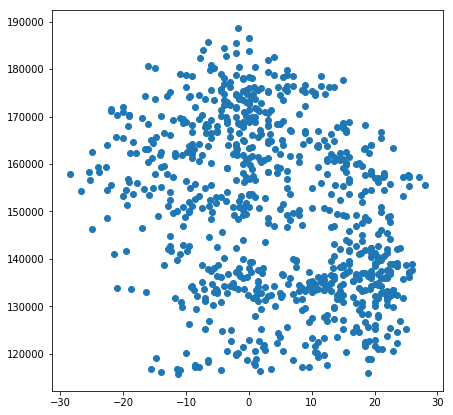

In [142]:
mean = df16['ACTUAL'].mean()
var = df16['ACTUAL'].var()

def sin(t,a,w,t0,b):
    return a*np.sin(w * t + t0) + b

def f(t):
    b1 = mean
    t0 = 13.5
    w = 1e-2 * 1.7
    a = 1.75*np.sqrt(var)
    return sin(t,a,w,t0,b1)

plt.figure(figsize=(10,7))
df16['ACTUAL'].plot()
(df16['Temp'] * 1e3 + 1e5 + 80000).plot()
OX = np.array(list(df16['ACTUAL'].keys()))
OY =  [f(t) for t in OX]
plt.plot(OX,OY)
plt.show()
temp = df16['Temp'].values[0:800]
eng = df16['ACTUAL'].values[0:800]
plt.figure(figsize=(7,7))
plt.plot(temp,eng,'o')
plt.show()

In [141]:

### kNN , k = 1 solution ###
def metric(v1, v2, normalize=True): 
    m1 = 0.0
    m2 = 0.0
    if normalize:
        m1 = np.mean(v1)
        m2 = np.mean(v2)
    return np.mean(((v1 - m1) - (v2 - m2))**2)
def kNN(LEN, train_x, test_x, train_y, test_y=None):
    test_len = len(test_x)
    points = []
    for i in range(len(train_y[:-(test_len + LEN)])):
        v = train_y[i:i+LEN]
        points.append((np.array(v), i+LEN))
    last_point = np.array(train_y[-LEN:])
    m1 = np.mean(last_point)
    dists = [metric(last_point, p[0]) for p in points]
    id_min = np.argmin(dists)
    i0 = points[id_min][1]
    m2 = np.mean(points[id_min][0])
    test_predictions = train_y[i0:i0 + test_len] - train_y[i0-1] + last_point[-1]
    loss = None
    if not test_y is None:
        loss = metric(test_predictions, test_y, normalize=False)
    return test_x, test_predictions, loss

# does not improve anything
def smoothing(values, l):
    values = np.concatenate([[values[0] for _ in range(l//2)], values, [values[-1] for _ in range(l//2 + l%2)]])
    ma = np.array([np.mean(values[i:i+l]) for i in range(len(values) - l)])
    return ma 

def kNNRunAll(train_x, train_y, test_x, len_range, plot=False, debug=False):
    LEN = len_range
    best_len = 0
    best_score = np.inf
    test_len = len(test_x)
    sum_predictions = np.zeros(len(test_x),dtype=np.float32)
    for length in LEN:
        test_x, test_predictions, _ = kNN(length, 
                                          train_x = train_x, 
                                          test_x = test_x, 
                                          train_y = train_y, 
                                          test_y = None)
        sum_predictions += np.array(test_predictions)
    test_predictions = sum_predictions / float(len(LEN))
    if plot :
        plt.figure(figsize=(20,17))
        plt.plot(train_x, train_y)
        plt.plot(test_x, test_predictions, color = 'green')
        plt.show()
    return test_x, test_predictions

def onefold(df, predict, validation_len=30, plot=True):
    train_y = df[df['ACTUAL'].notnull()]['ACTUAL'].values
    train_x = df[df['ACTUAL'].notnull()]['ID'].values
    test_x = df[df['ACTUAL'].isnull()]['ID'].values
    lb = np.arange(320,321,10) 
    rb = np.arange(500, 501, 10)
    min_loss = np.inf
    best_params = (-1,-1)
    for l in lb:
        for r in rb:
            len_range = np.arange(l,r,5)
            validation_train_x, validation_test_x = train_x[:-validation_len], train_x[-validation_len:]
            validation_train_y, validation_test_y = train_y[:-validation_len], train_y[-validation_len:]
            _, validation_predictions = predict(validation_train_x, validation_train_y, validation_test_x, len_range)

            validation_predictions = np.array(validation_predictions)
            Y = np.array(validation_test_y)

            loss = np.mean((validation_predictions - Y)**2) / (np.var(train_y))
            if loss < min_loss:
                min_loss = loss
                best_params = l,r
       
    print('loss ', min_loss * 100.0)
    print('with params : ', best_params)
    
    test_X, forecast = predict(train_x, train_y, test_x, np.arange(best_params[0], best_params[1], 5))
    if plot:
        plt.figure(figsize=(20,17))
        plt.plot(train_x, train_y)
        plt.plot(validation_test_x, validation_predictions, color = 'red')
        plt.plot(test_x, forecast, color = 'green')
        plt.show()
    return test_X, forecast , min_loss


In [90]:

### Fourier representation solution ###

W = 1e-2 * np.arange(0.01, 15.0, 0.1)
def get_features(T):
    sin_features = np.sin(np.array([W * t for t in T]))
    cos_features = np.cos(np.array([W * t for t in T]))
    print('shape', sin_features.shape)
    all_features = np.concatenate([sin_features,cos_features], axis=1)
    print(all_features.shape)
    return all_features
def proceed_with_certain_time_series(df):
    train_y = df[df['ACTUAL'].notnull()]['ACTUAL']
    train_x = df[df['ACTUAL'].notnull()]['ID']
    test_x = df[df['ACTUAL'].isnull()]['ID']
    print(train_y.head())
    print(train_x.head())
    regressor = Ridge(alpha=1.0)
    train_features = get_features(train_x)
    test_features = get_features(test_x)
    print(train_features.shape)
    print(train_y.shape)
    regressor.fit(train_features, train_y)
    train_predictions = regressor.predict(train_features)
    test_predictions = regressor.predict(test_features)
#     plt.figure(figsize=(20,17))
#     plt.plot(train_x, train_predictions, color='red')
#     plt.plot(train_x, train_y)
#     plt.plot(test_x, test_predictions, color = 'green')
#     plt.show()
    return test_x, test_predictions

In [87]:
def process_all(predict):
    X, Y = [],[]
    loss_all = 0.0
    for i in range(1,23):
        x, y, loss = onefold(df[df['tsID'] == i], predict)
        loss_all += loss
        X.append(x)
        Y.append(y)
    loss_all /= len(range(1,23))
    print('result loss ' , loss_all * 100.0)
    all_x = np.concatenate(X)
    all_y = np.concatenate(Y)
    all_x = [int(x) for x in all_x]
    data = np.array([np.array(all_x, dtype=np.int32),np.array(all_y)])
    print(data.shape)
    dfout = pd.DataFrame(data=data.transpose(), columns=['ID','PREDICTED'])
    dfout['ID']=dfout['ID'].apply(int)
    dfout.to_csv('out.csv', index_label='ID', index=False)

In [55]:
# Fourier + LinReg
process_all(proceed_with_certain_time_series)


loss  1.06724647372
with params :  (320, 500)


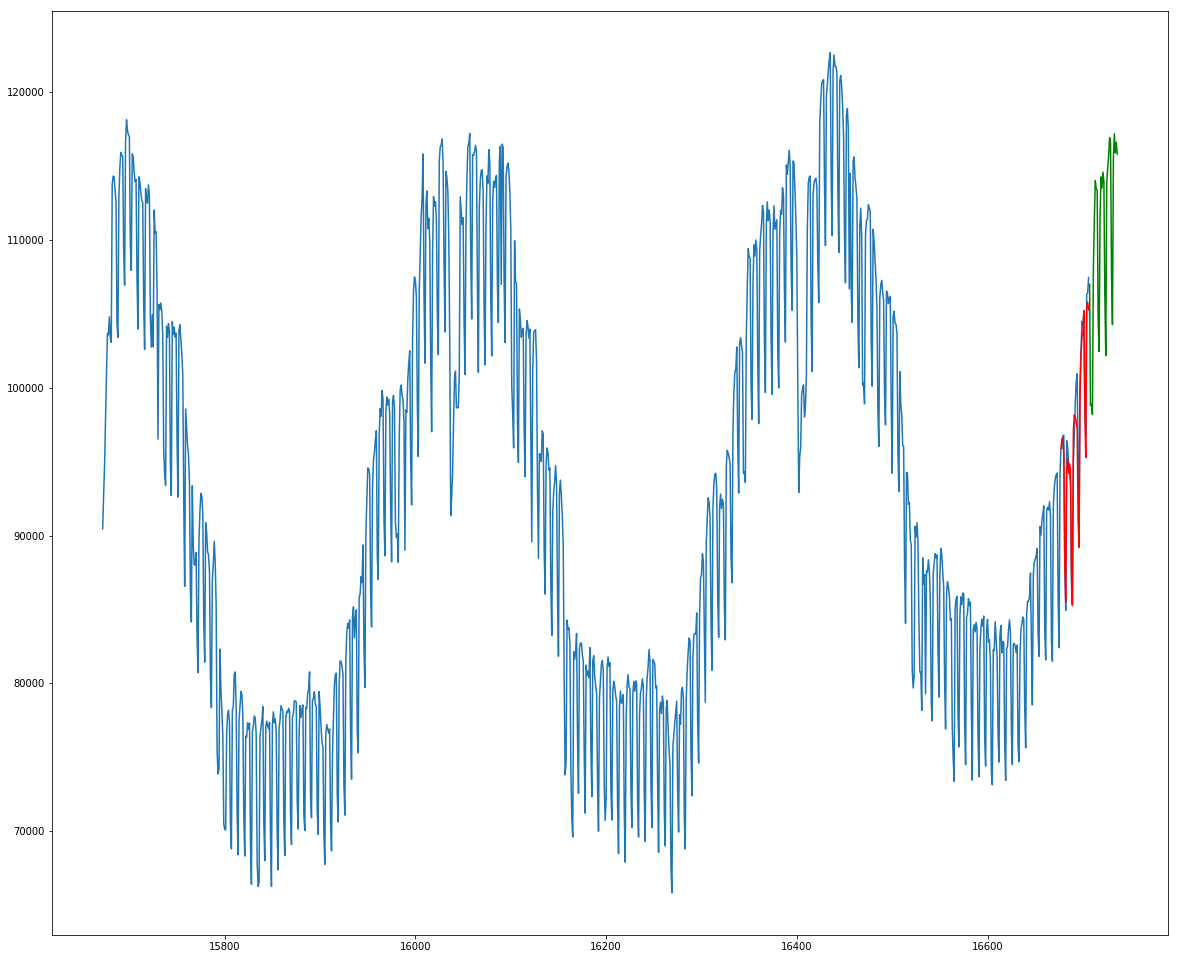

loss  0.762984800952
with params :  (320, 500)


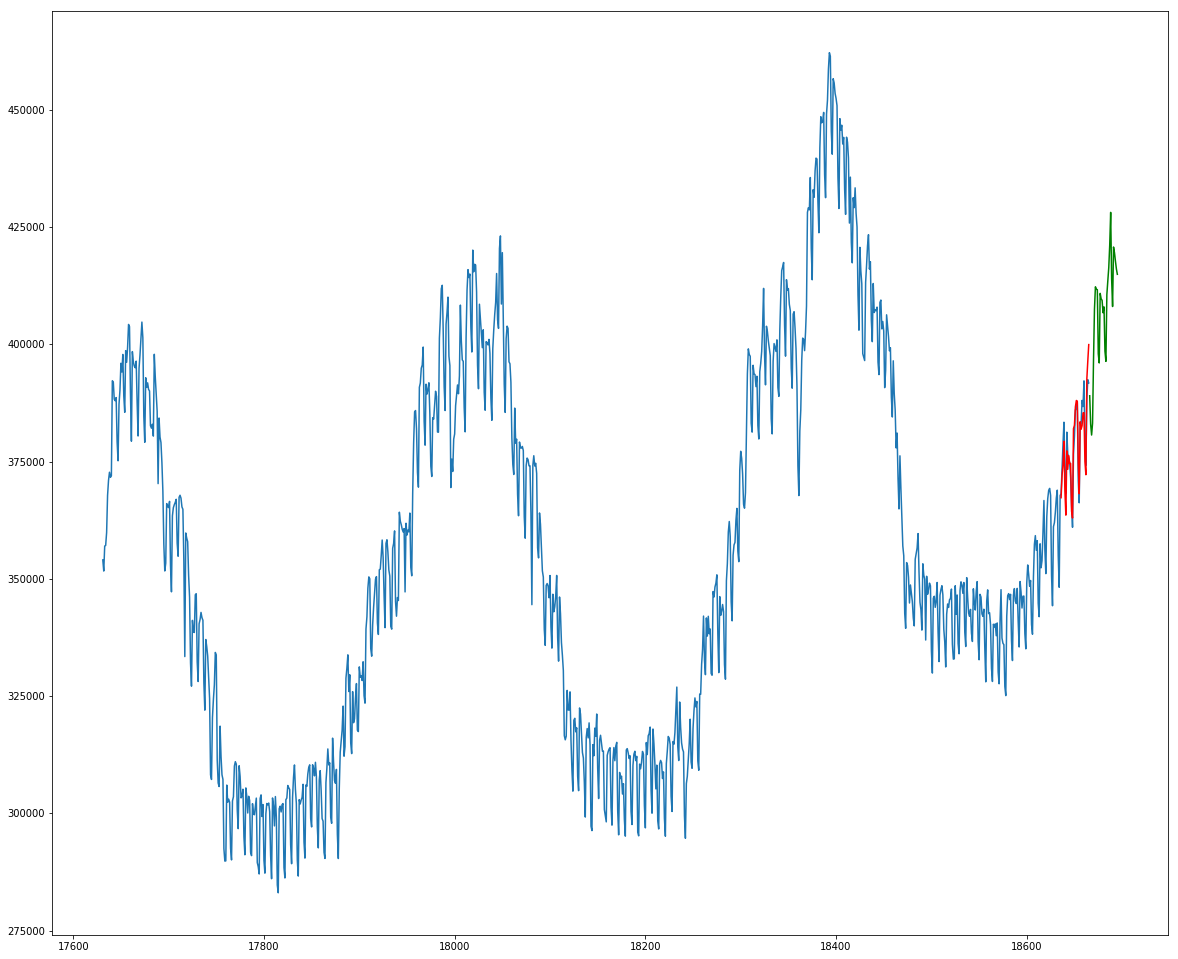

loss  6.36312417917
with params :  (320, 500)


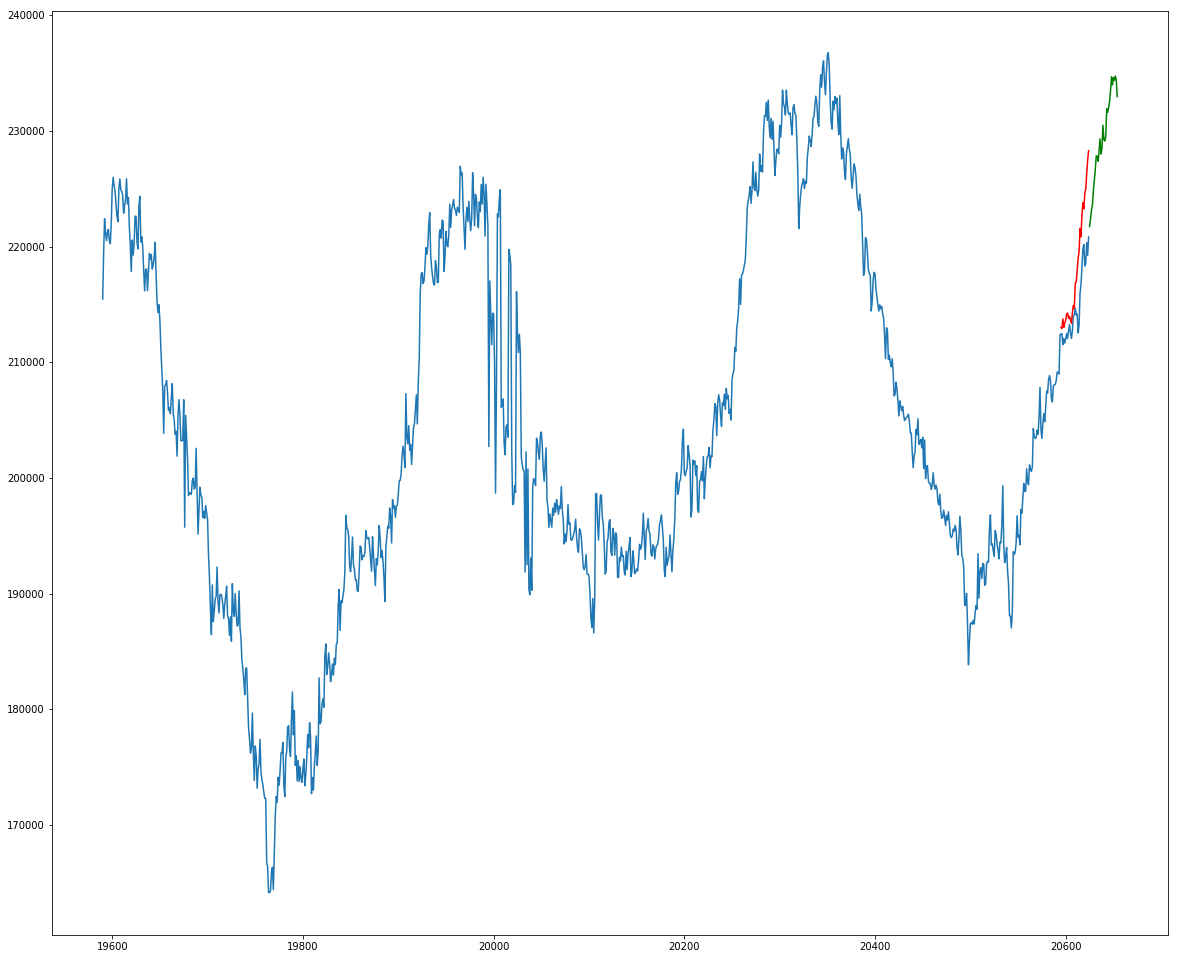

loss  3.00083760118
with params :  (320, 500)


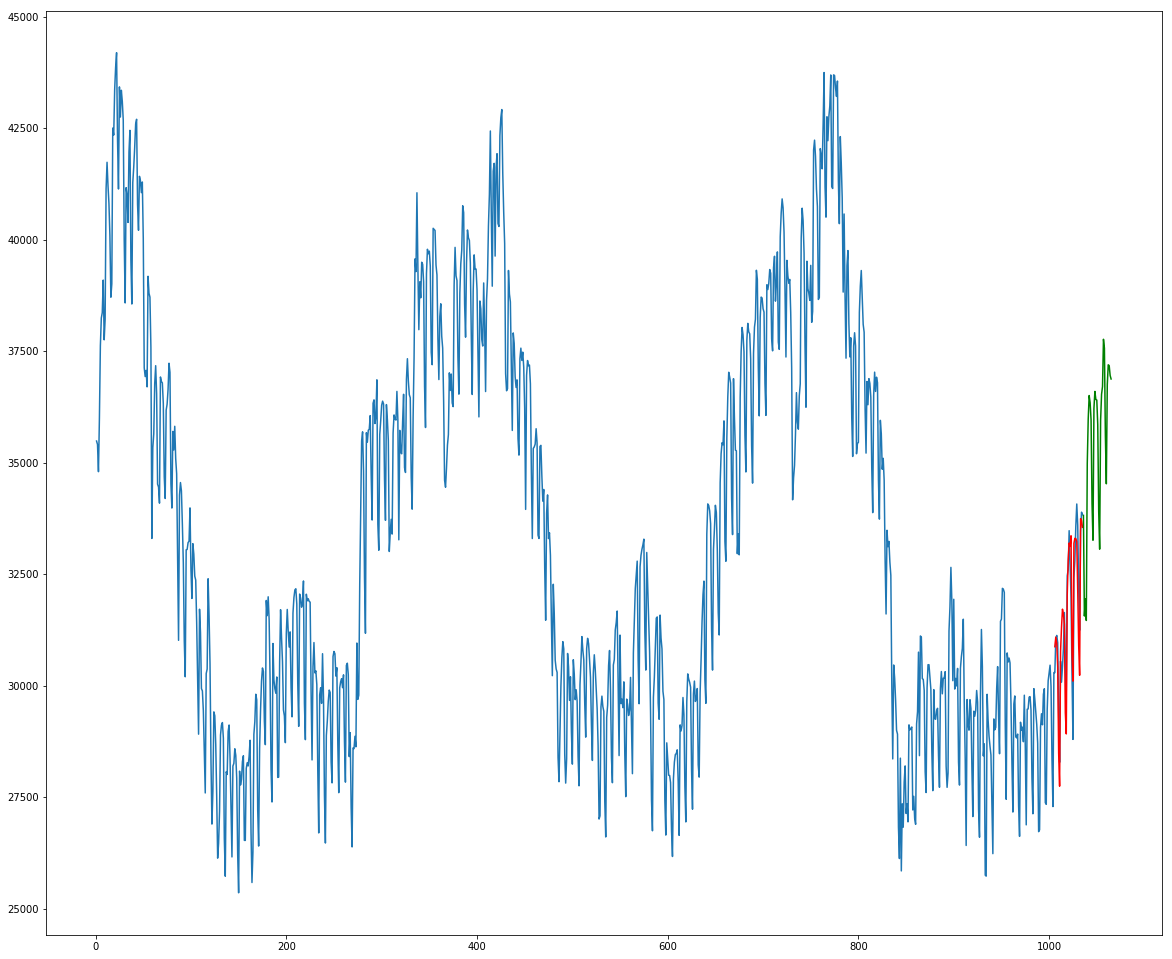

loss  3.31710032938
with params :  (320, 500)


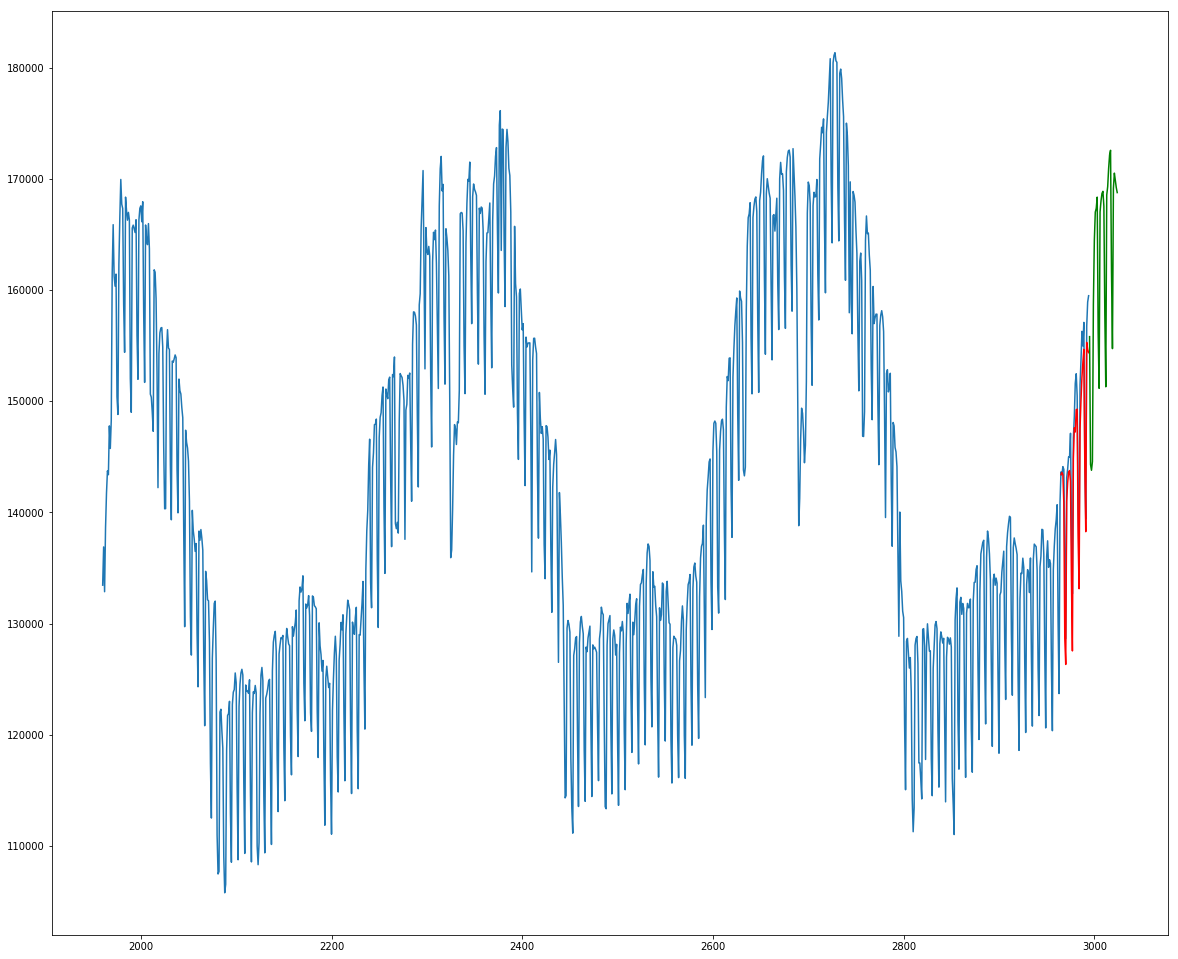

loss  13.5120988456
with params :  (320, 500)


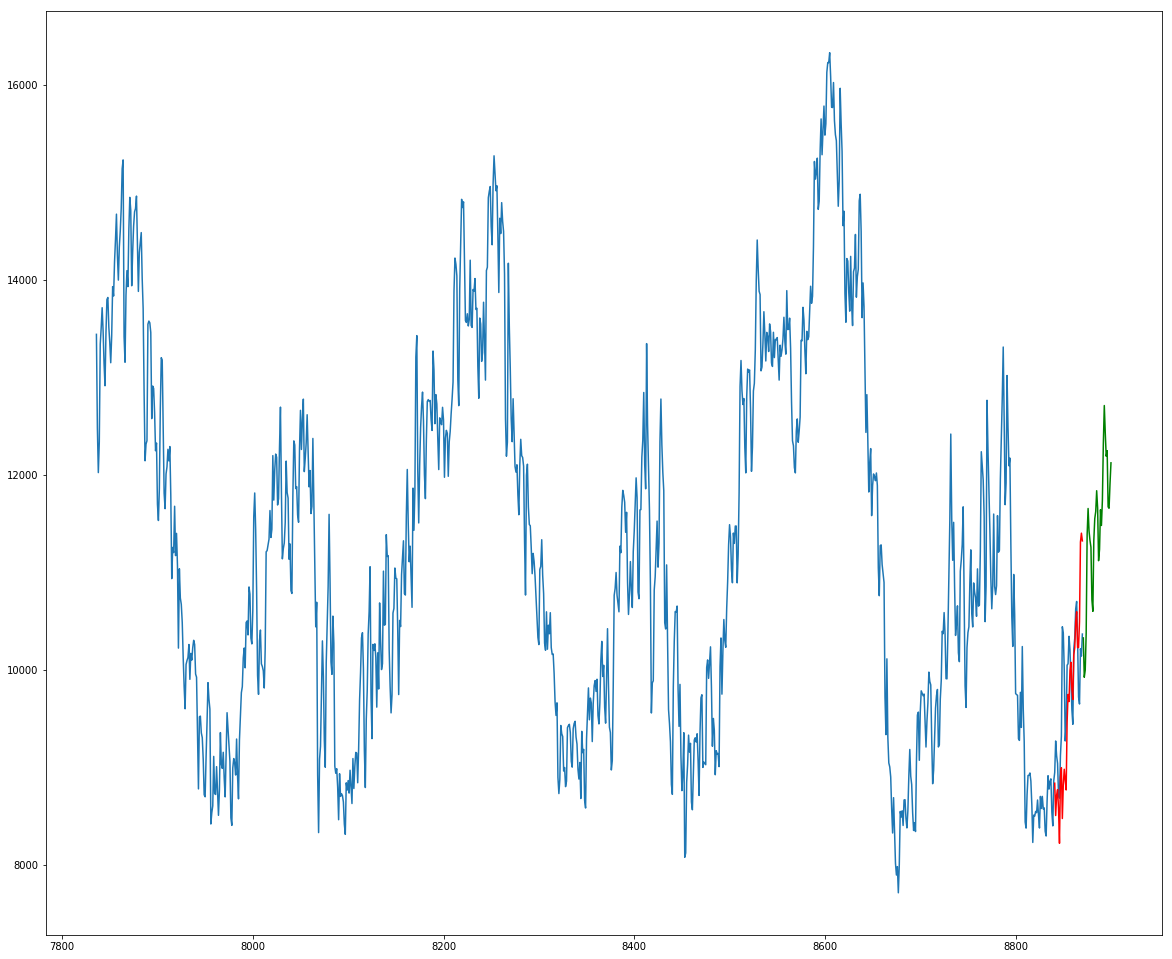

loss  42.9472036535
with params :  (320, 500)


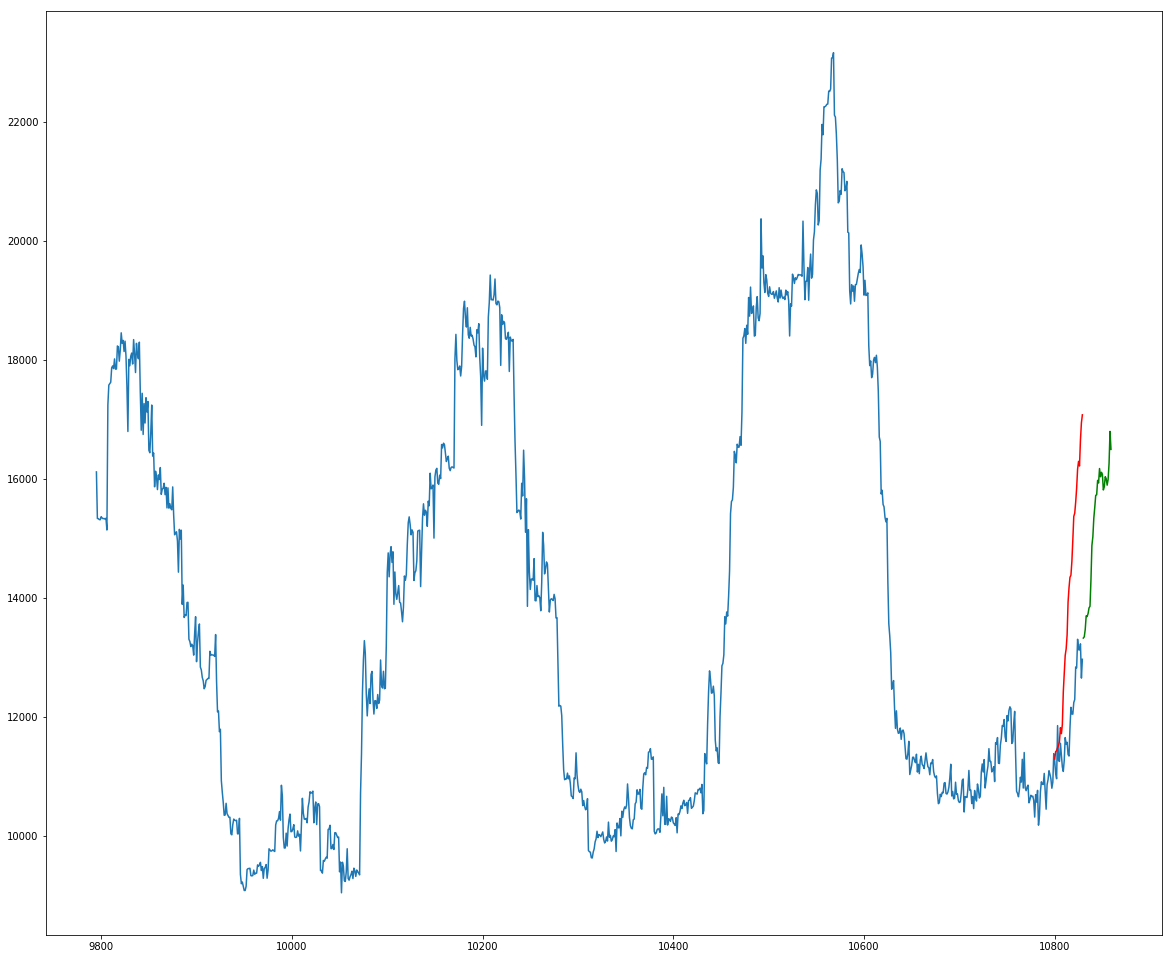

loss  9.42685491223
with params :  (320, 500)


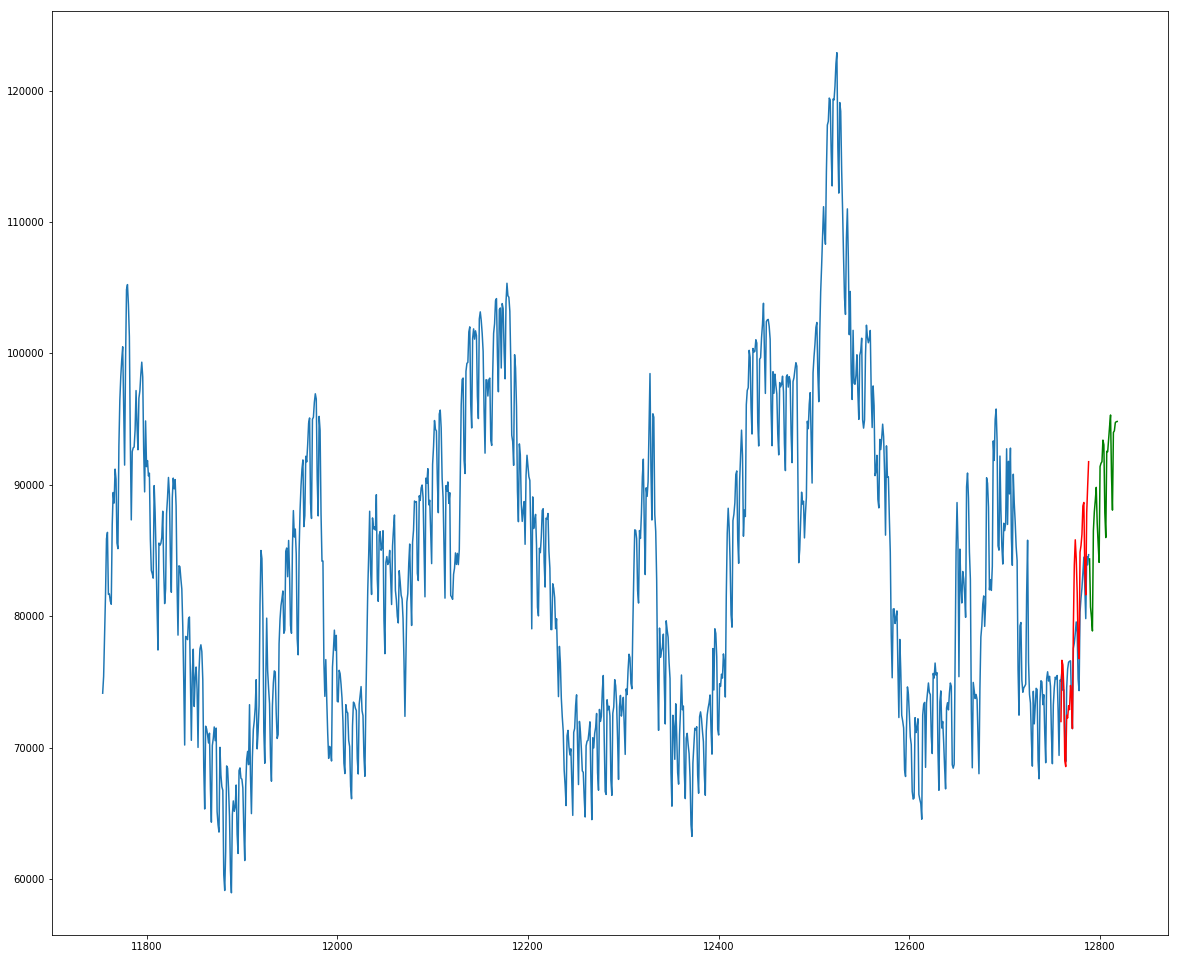

loss  4.98786034284
with params :  (320, 500)


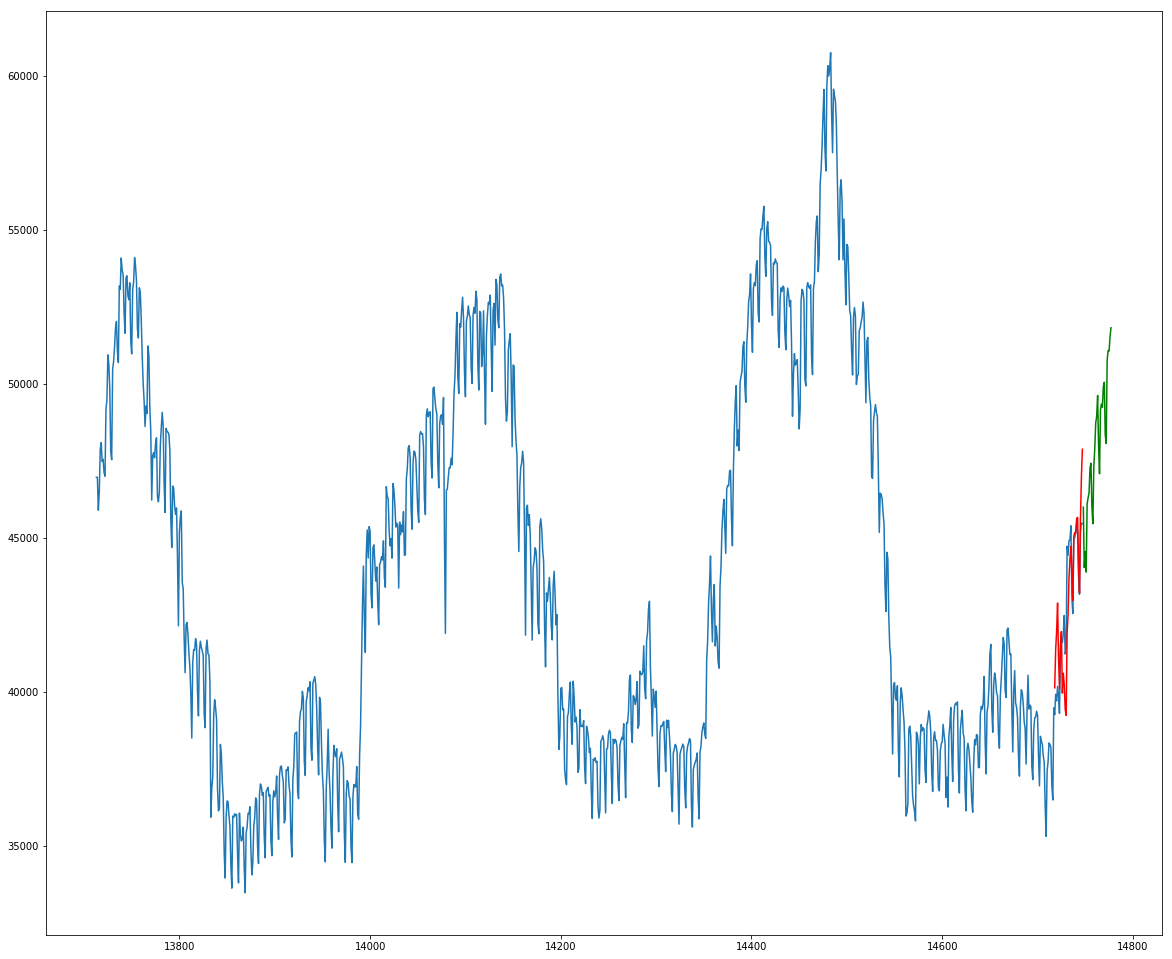

loss  21.5954926994
with params :  (320, 500)


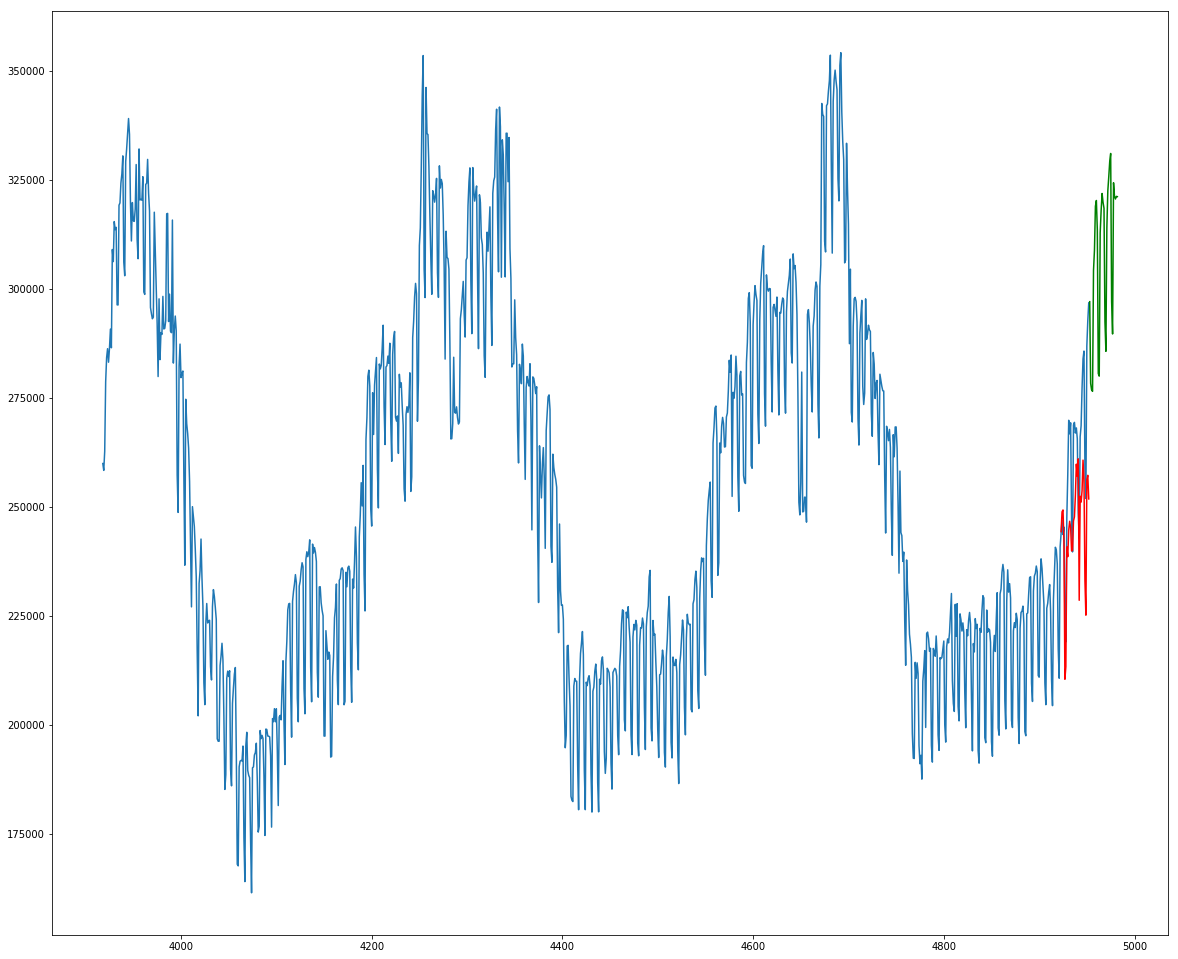

loss  1.5313644991
with params :  (320, 500)


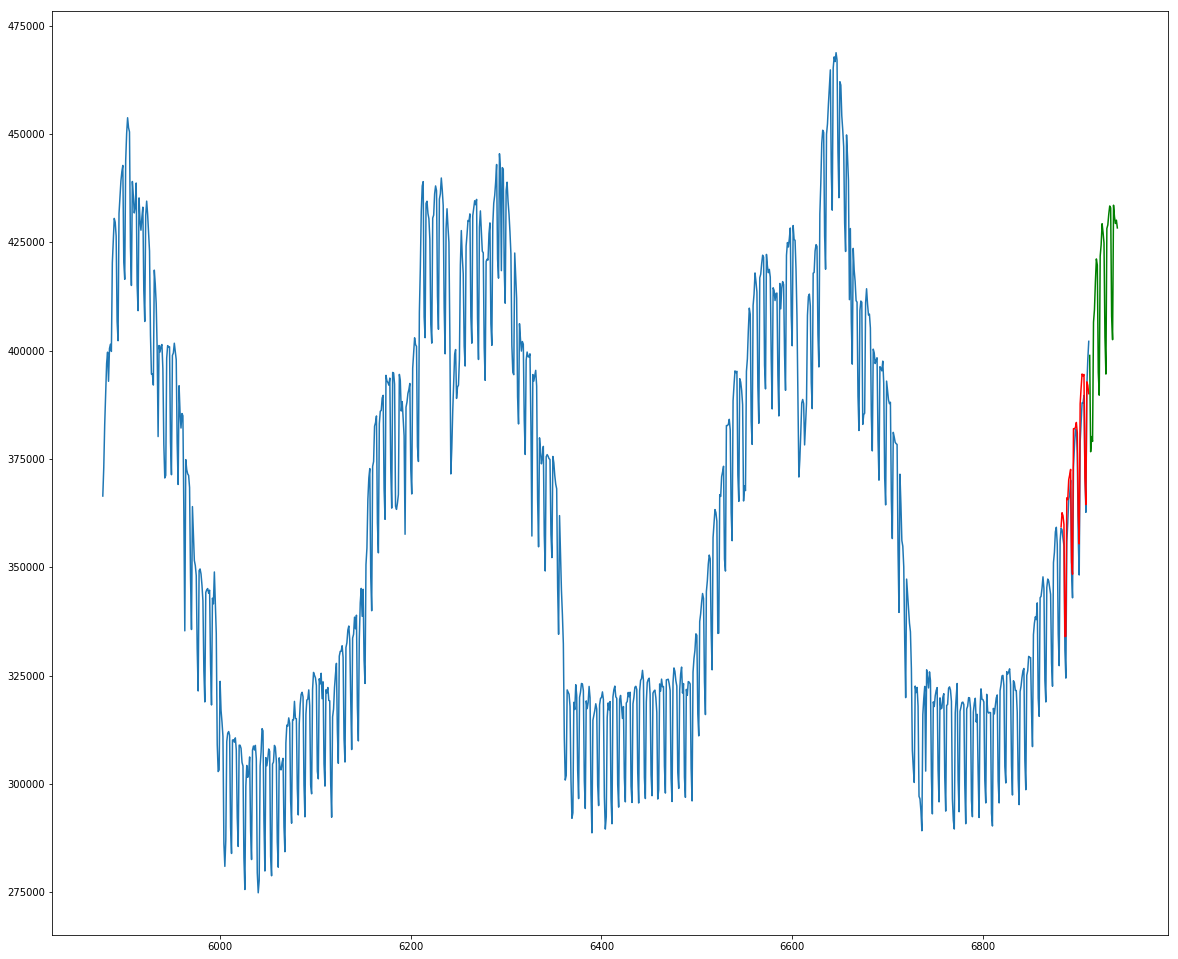

loss  3.42066849434
with params :  (320, 500)


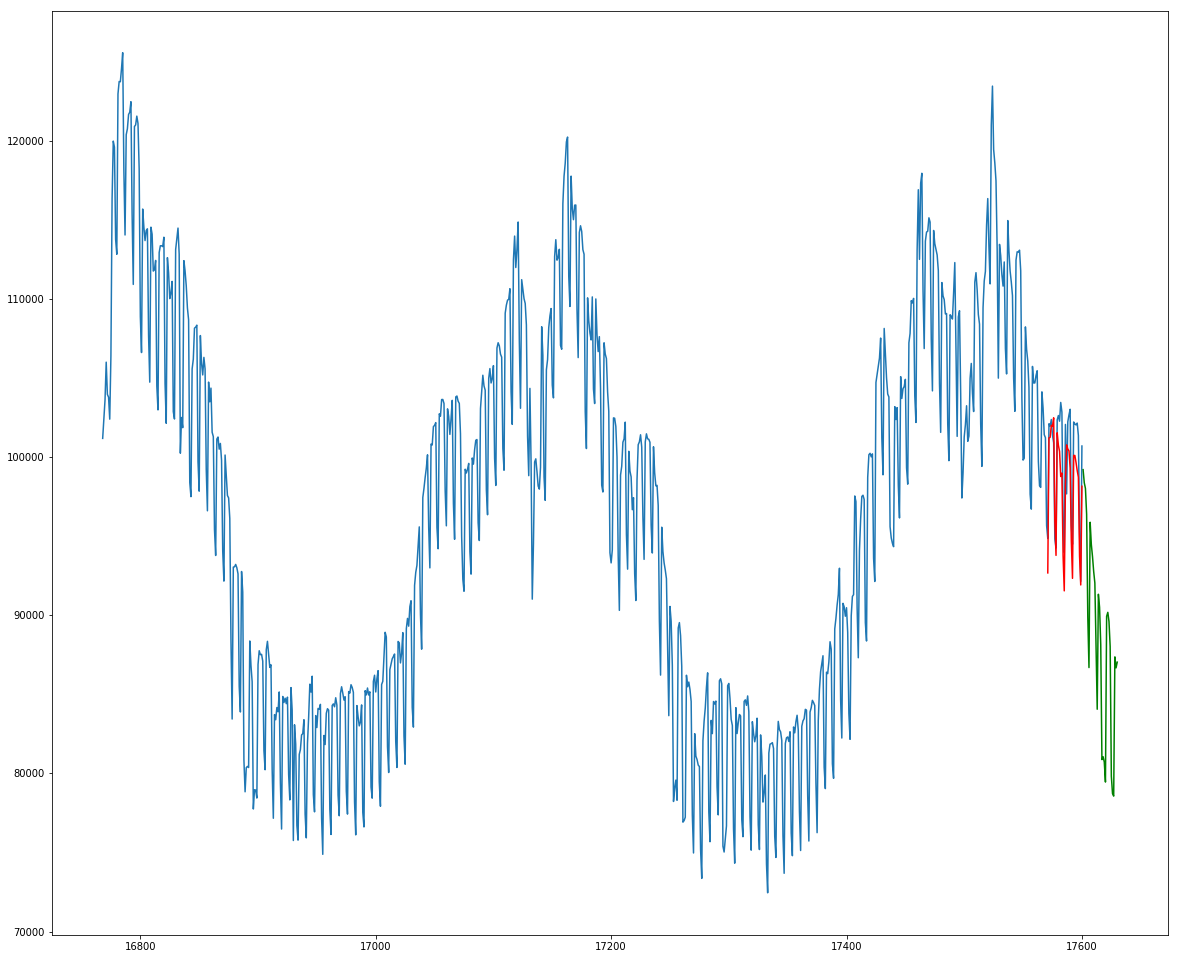

loss  4.6938528144
with params :  (320, 500)


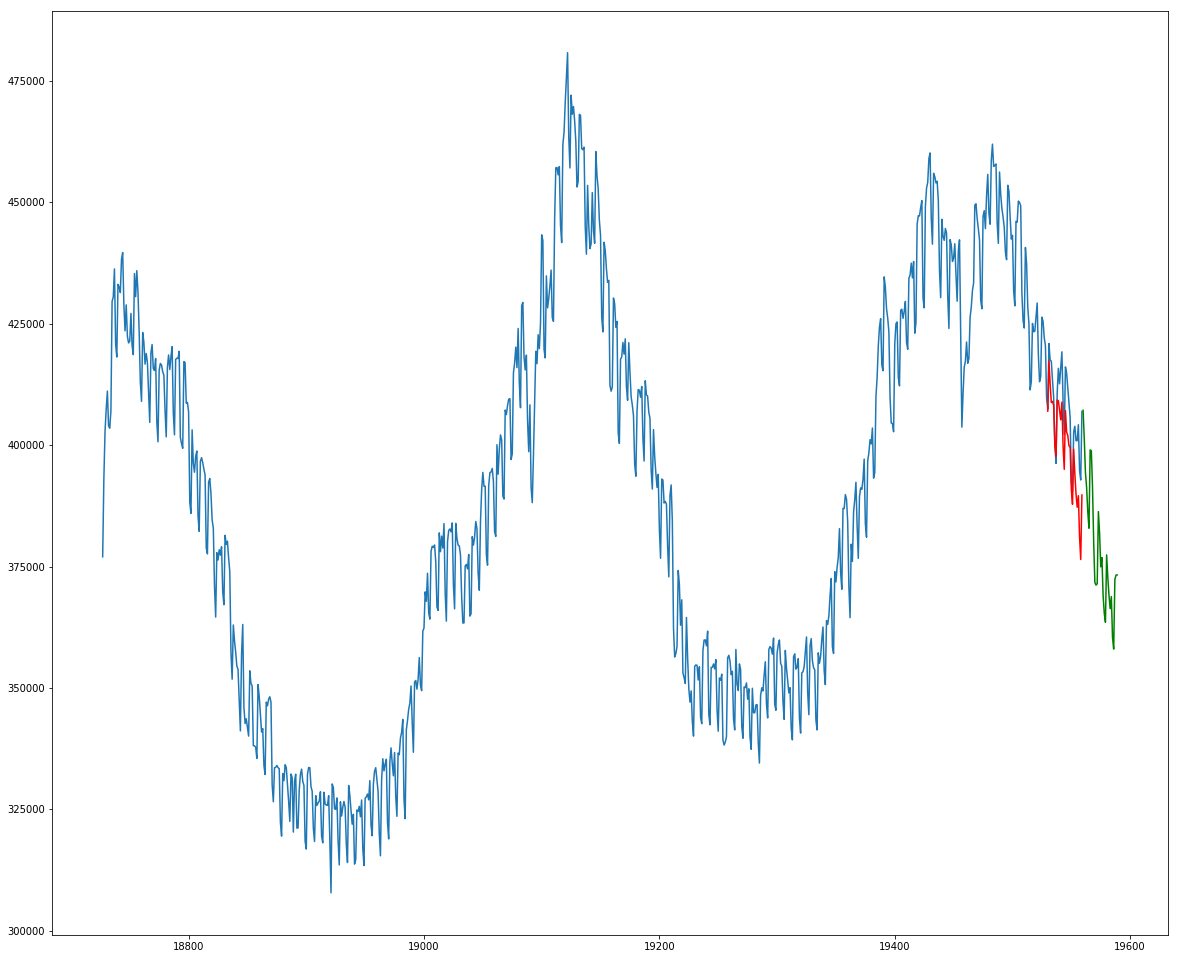

loss  7.57639801719
with params :  (320, 500)


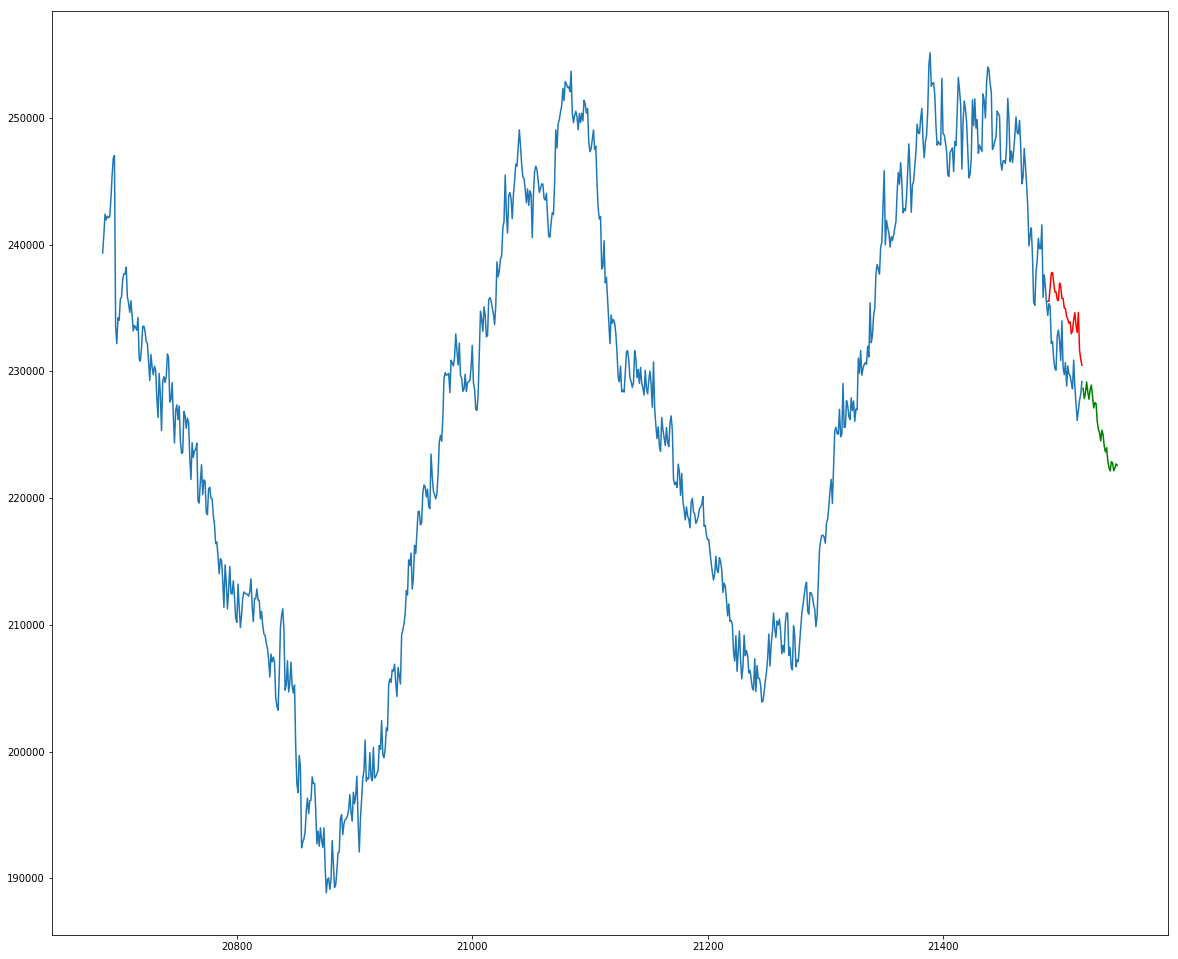

loss  3.95369594124
with params :  (320, 500)


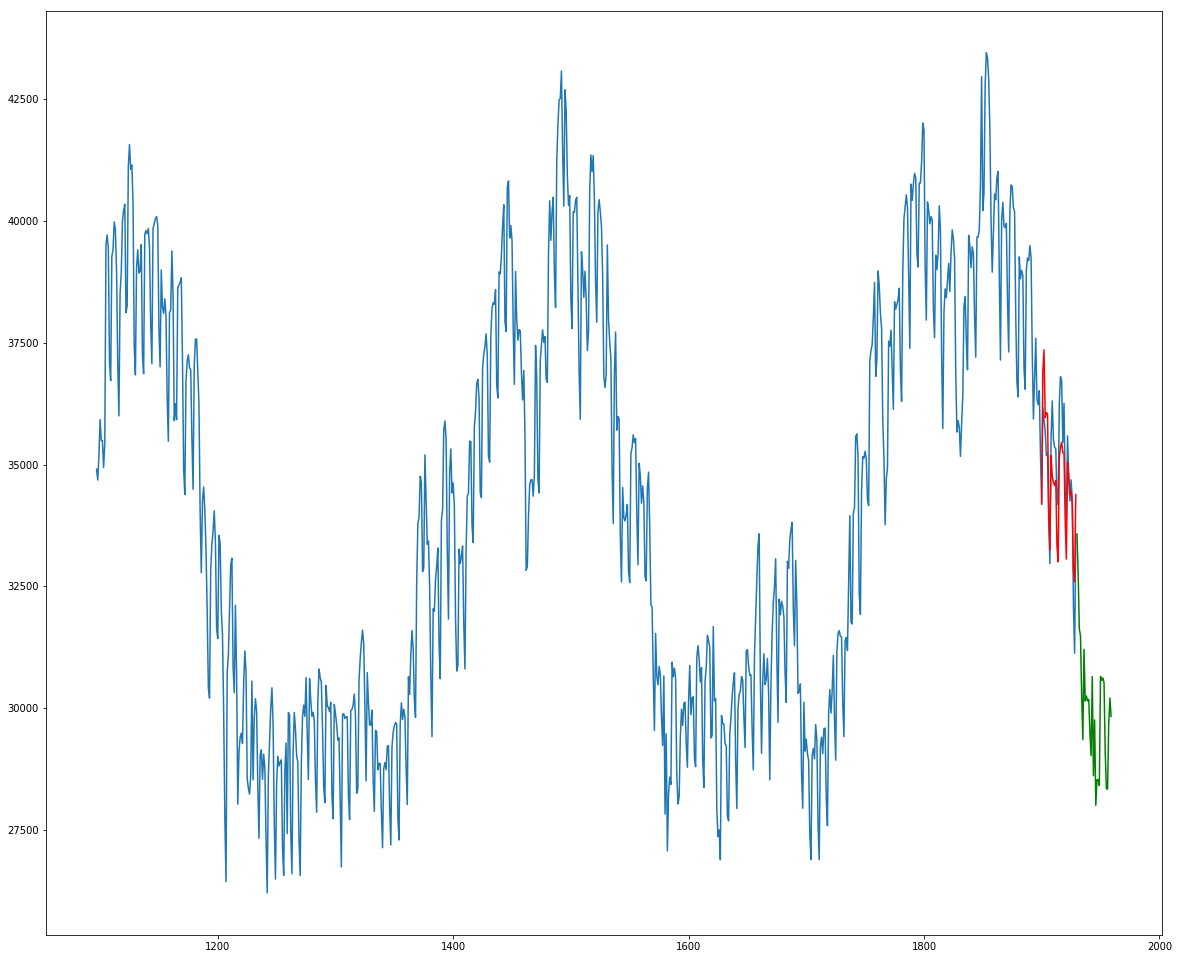

loss  4.98419743634
with params :  (320, 500)


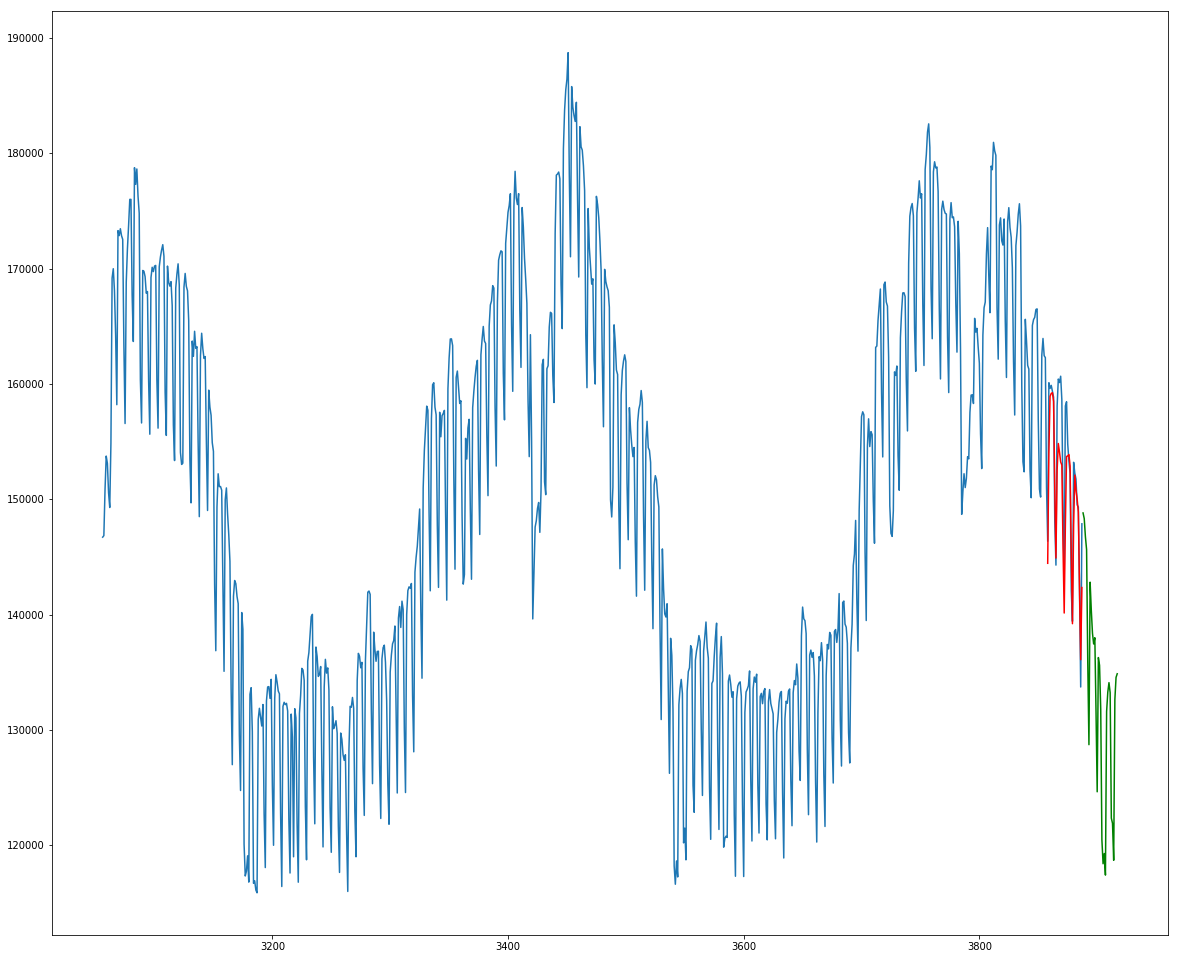

loss  3.95661831854
with params :  (320, 500)


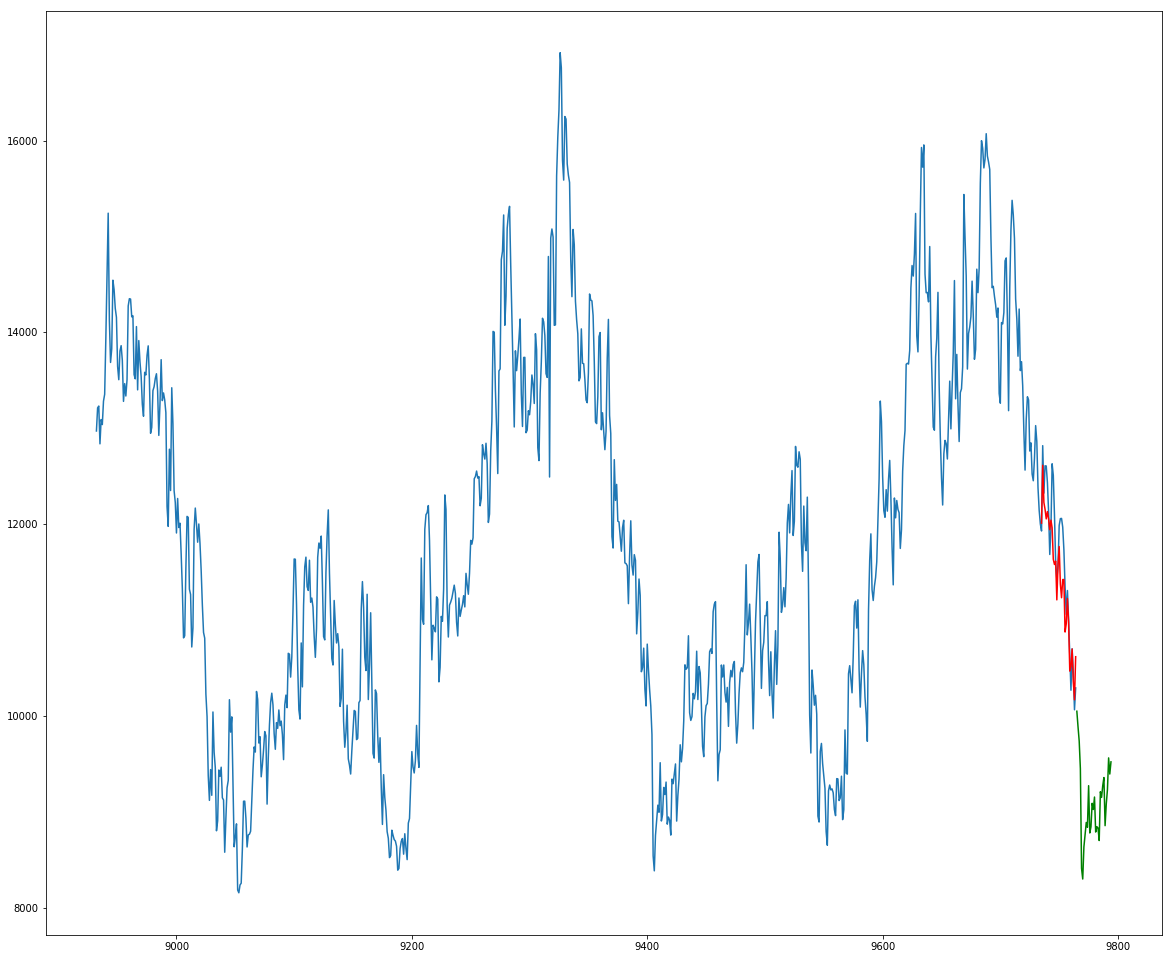

loss  2.11383127075
with params :  (320, 500)


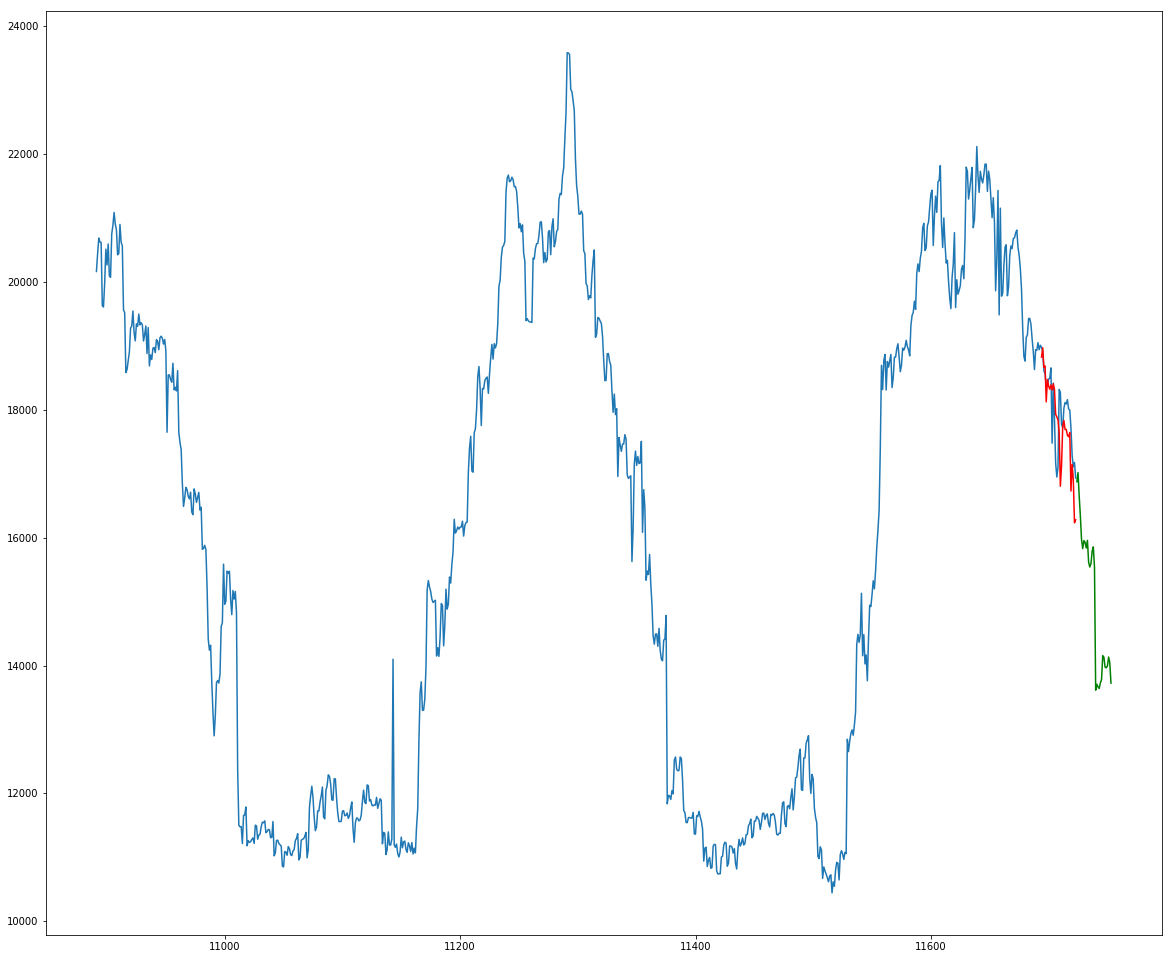

loss  9.41910862907
with params :  (320, 500)


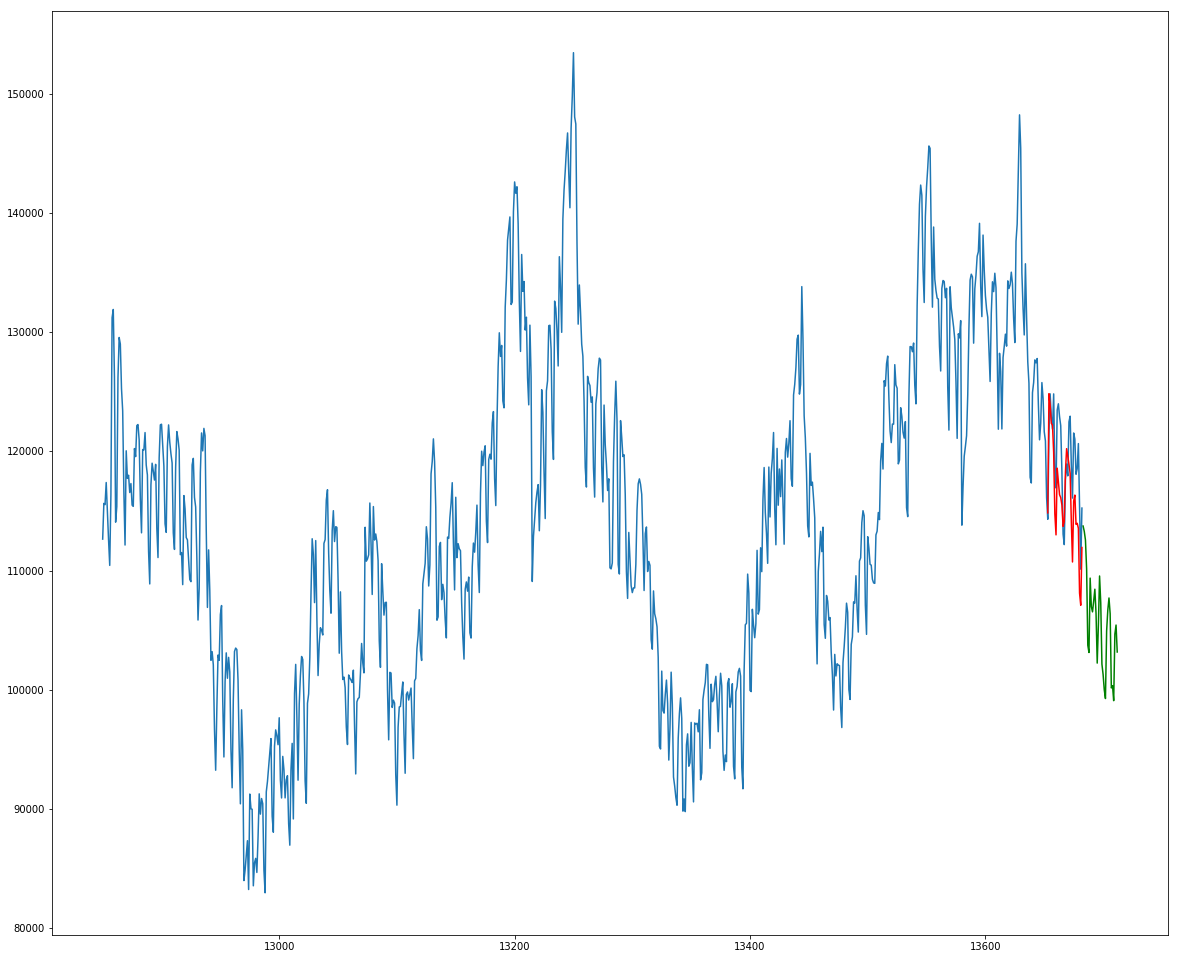

loss  11.9275214431
with params :  (320, 500)


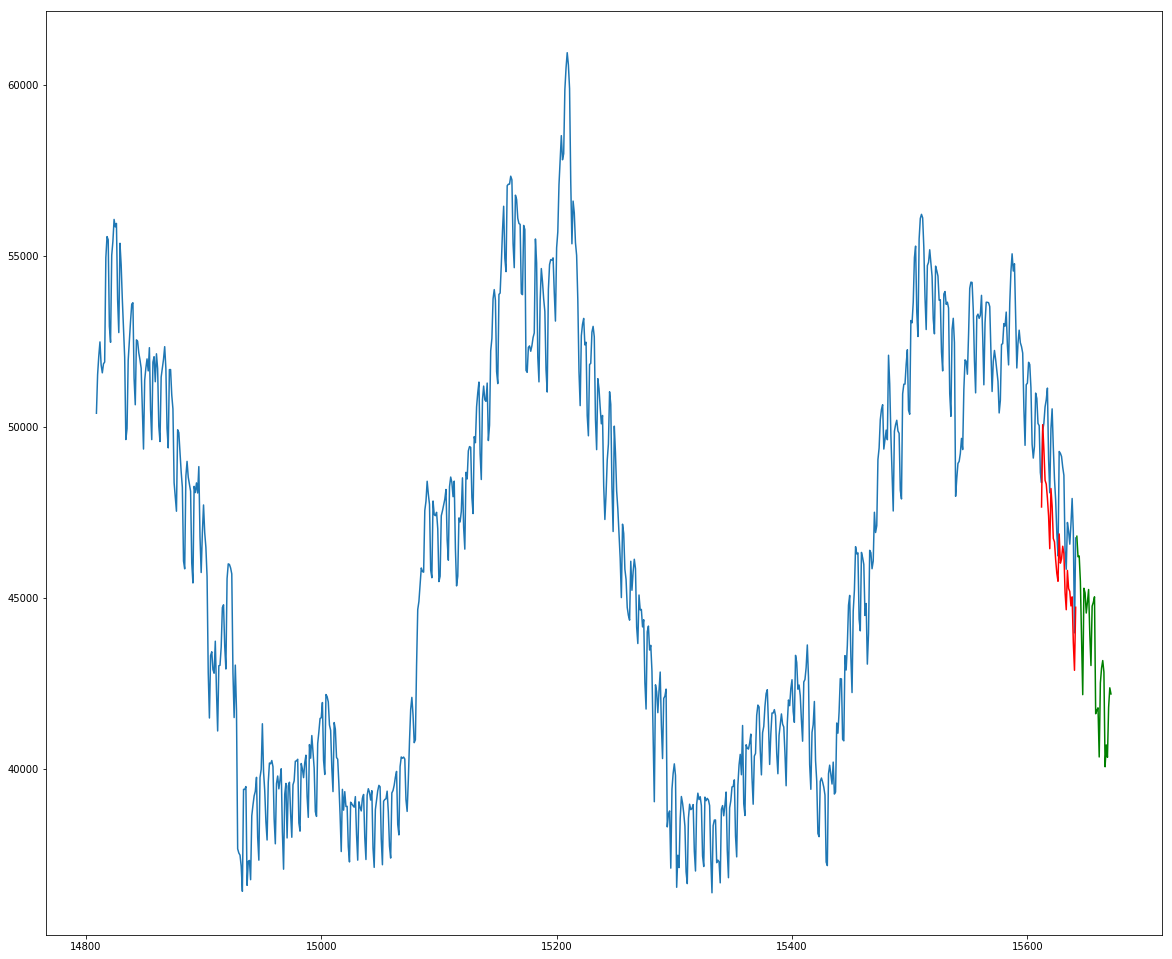

loss  2.6978514569
with params :  (320, 500)


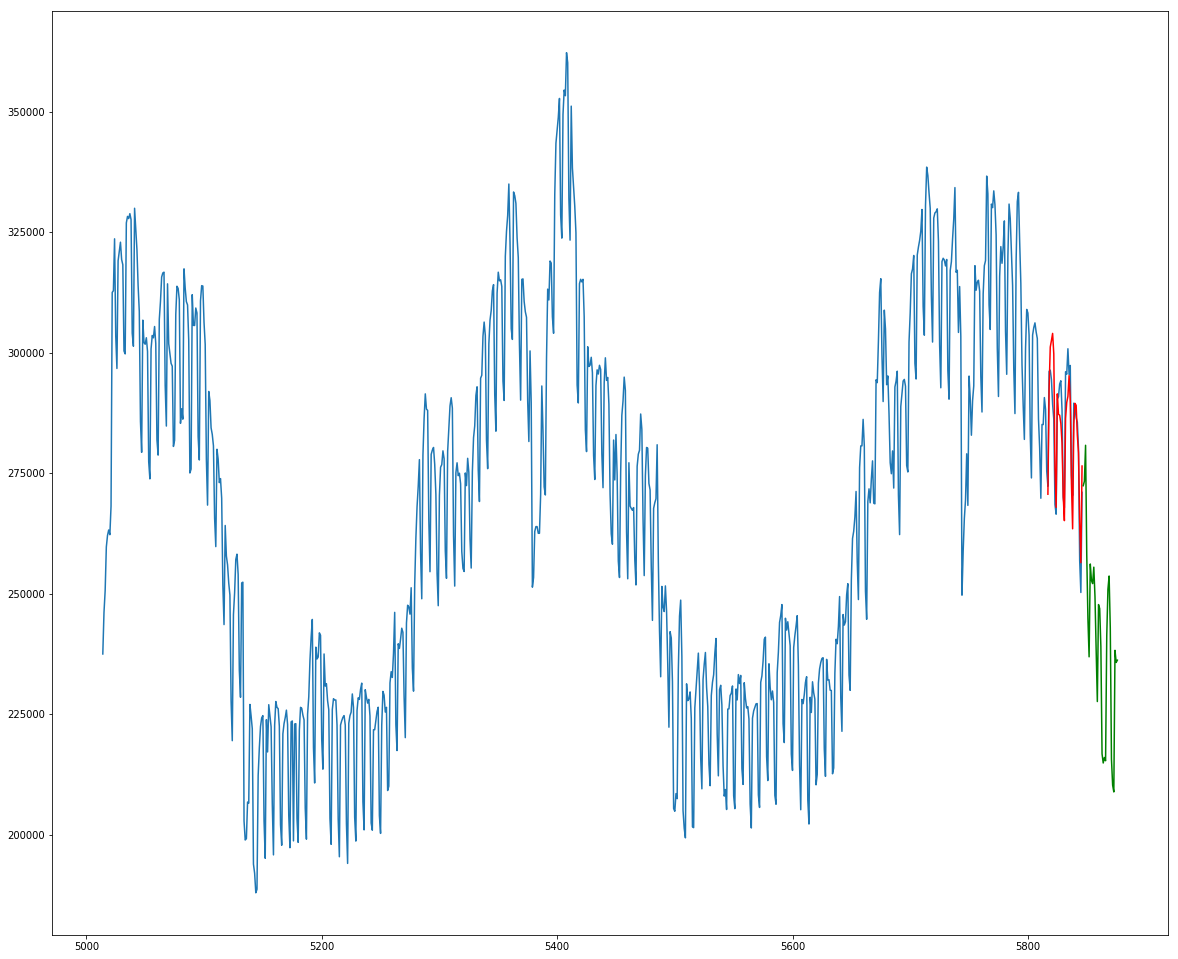

loss  1.8177408835
with params :  (320, 500)


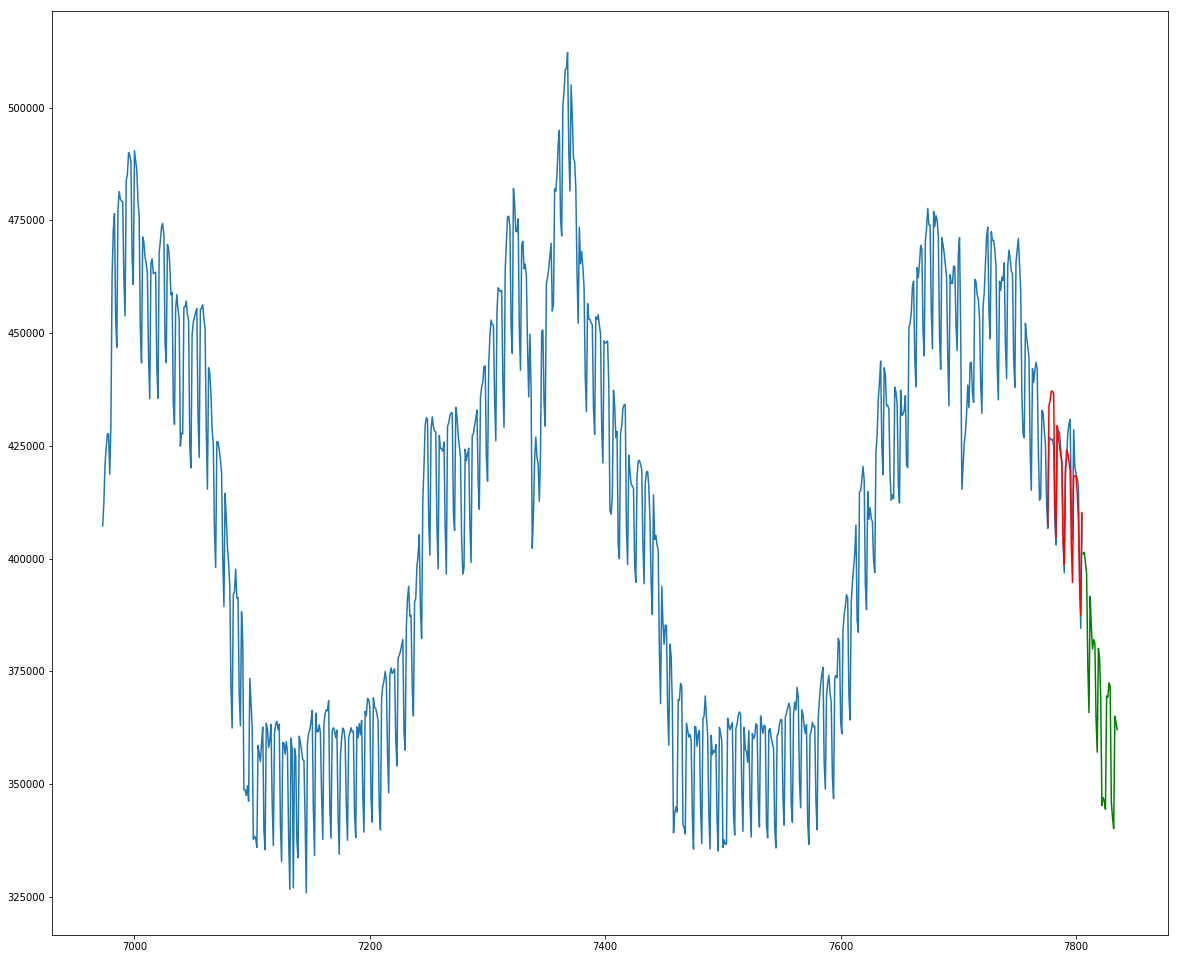

result loss  7.50334786557
(2, 660)


In [142]:
# kNN
process_all(kNNRunAll)